In [1]:
from MultiAssetClass import *
from tqdm import tqdm
import time
import pandas as pd


In [2]:
no_of_paths = 30000
no_of_assets = 5
K = 1
T = 1
no_of_exercise_days = 1
dt = T / (no_of_exercise_days)
cor_mat = [[1.0, 0.79, 0.82, 0.91, 0.84],
           [0.79, 1.0, 0.73, 0.80, 0.76],
           [0.82, 0.73, 1.0, 0.77, 0.72],
           [0.91, 0.80, 0.77, 1.0, 0.90],
           [0.84, 0.76, 0.72, 0.90, 1.0]]
cor_mat = np.ones((no_of_assets, no_of_assets))
vol_list = np.array([0.518, 0.648, 0.623, 0.570, 0.530])

w = np.array([0.381, 0.065, 0.057, 0.270, 0.227])
w = w.reshape(-1, 1)
# cor_mat = np.eye(no_of_assets)
# vol_list = np.ones(no_of_assets) * 0.2
#cov_mat = generate_covarinace_mat(cor_mat, vol_list, dt)
r = 0.05
S0 = 1
divident = 0.0
learning_rate = 1e-3
no_hidden_nodes = 16
#nn_model = multi_asset_NN(no_hidden_nodes)
#RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.8583e-06
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - loss: 4.9849e-06
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 2.3852e-06
mse at 0 2.411787818346056e-06


(0.18752240706564505,
 array([3.90289961e-06]),
 [[array([[-0.07143216, -0.04493855, -0.03734924, -0.02601859,  0.30776927,
           -0.01557669,  0.21337606, -0.06309395,  0.12491537,  0.16041209,
           -0.02815985,  0.10640379, -0.03545682,  0.12407661, -0.06762392,
            0.06031195],
          [-0.01256343, -0.04164806,  0.0185592 , -0.05444462,  0.3078582 ,
           -0.00896072,  0.26683545, -0.0604499 ,  0.07747555,  0.07462918,
           -0.01341839,  0.02617717,  0.01150693,  0.11110941, -0.0622184 ,
            0.0947124 ],
          [-0.02230085, -0.01116717, -0.06526481, -0.05516345,  0.23056951,
           -0.08950716,  0.29621425,  0.00179101,  0.06677334,  0.12442973,
           -0.02503874,  0.06702928, -0.06298265,  0.15678939, -0.01816395,
            0.09257409],
          [-0.02788643, -0.06138476, -0.05338672, -0.02276826,  0.31025392,
           -0.06926192,  0.28316954, -0.06805234,  0.07200296,  0.12982954,
            0.06201551,  0.07788411, -0.0

In [3]:
N = 2
option_price_MC_Basket = []
for paths in tqdm(range(5000, 100000, 500)):
    #print(paths)
    option_price_MC_Basket.append(arithmatic_basket_option_price(S0, r, vol_list, cor_mat, dt, N, w, K, paths))


100%|██████████| 190/190 [05:33<00:00,  1.75s/it]


In [4]:
dict = {"Paths": range(5000, 100000, 500), "Option Price": option_price_MC_Basket}
df = pd.DataFrame(dict)
df.to_csv("./Results/Basket_MC.csv", index=False)

In [10]:
## From Paper True Option Price for Basket Put Option
true_price = 18.745
option_price_MC_Basket = np.array(option_price_MC_Basket) * 100

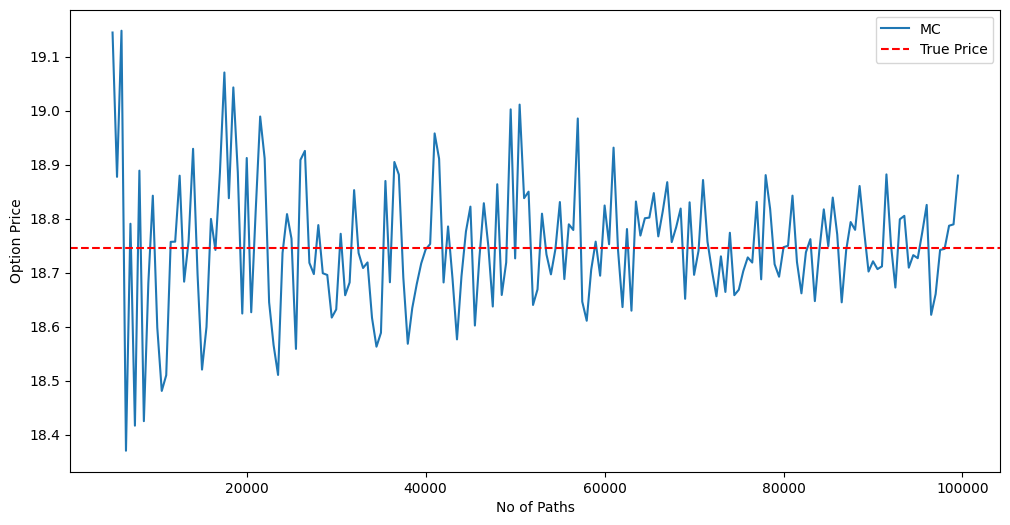

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(range(5000, 100000, 500), option_price_MC_Basket, label="MC")
plt.axhline(y=true_price, color='r', linestyle='--', label="True Price")
plt.xlabel("No of Paths")
plt.ylabel("Option Price")
plt.legend()
plt.show()

In [12]:
learning_rate = 1e-3
no_hidden_nodes = [2, 4, 8, 16, 32, 64, 128, 256]
basket_mse = []
RLNN_Basket_price = []
time_taken_lr1 = []
for hidden_node in  tqdm(no_hidden_nodes):
    start_time = time.time()
    nn_model = multi_asset_NN(hidden_node)
    Basket_price, mse, _ = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    time_taken_lr1.append(time.time() - start_time)
    basket_mse.append(mse)
    RLNN_Basket_price.append(Basket_price)

  0%|          | 0/8 [00:00<?, ?it/s]

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 9.4473e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - loss: 8.6745e-04
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 9.7586e-04


 12%|█▎        | 1/8 [00:05<00:39,  5.64s/it]

mse at 0 0.0009844666346907616
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - loss: 1.0734e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - loss: 7.7141e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 8.5752e-05


 25%|██▌       | 2/8 [00:15<00:47,  7.88s/it]

mse at 0 8.567859185859561e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - loss: 2.4039e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 1.7056e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 1.6781e-05


 38%|███▊      | 3/8 [00:24<00:42,  8.45s/it]

mse at 0 1.7040438251569867e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - loss: 1.3799e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - loss: 5.3220e-06
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 5.9870e-06


 50%|█████     | 4/8 [01:14<01:40, 25.05s/it]

mse at 0 5.988355042063631e-06
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 5.8356e-06
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - loss: 2.9765e-07
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 3.3226e-07


 62%|██████▎   | 5/8 [01:23<00:57, 19.03s/it]

mse at 0 3.4613429988894495e-07
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 8.0160e-06
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 7.8755e-08
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 1.3605e-07
mse at 0 1.5388705776331335e-07


 75%|███████▌  | 6/8 [01:32<00:31, 15.82s/it]

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 2.7146e-06
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 1.3180e-07
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 1.3889e-07
mse at 0 1.4240620771488466e-07


 88%|████████▊ | 7/8 [01:43<00:14, 14.33s/it]

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 1.9261e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 7.0453e-08
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 6.9953e-08
mse at 0 7.039758997962053e-08


100%|██████████| 8/8 [01:58<00:00, 14.75s/it]


In [15]:
dict = {"Hidden Nodes": no_hidden_nodes, "Option Price": RLNN_Basket_price, "MSE": basket_mse, "Time Taken": time_taken_lr1}
df = pd.DataFrame(dict)
df.to_csv("./Results/Basket_RLNN_Hidden_Nodes_lr1_3.csv", index=False)

In [16]:
learning_rate = 5e-3
no_hidden_nodes = [2, 4, 8, 16, 32, 64, 128, 256]
basket_mse_lr4 = []
RLNN_Basket_price_lr4 = []
time_taken_lr2 = []
for hidden_node in  tqdm(no_hidden_nodes):
    start_time = time.time()
    nn_model = multi_asset_NN(hidden_node)
    Basket_price, mse, _ = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    time_taken_lr2.append(time.time() - start_time)
    basket_mse_lr4.append(mse)
    RLNN_Basket_price_lr4.append(Basket_price)

  0%|          | 0/8 [00:00<?, ?it/s]

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 0.0010
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - loss: 8.6885e-04
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 9.9614e-04


 12%|█▎        | 1/8 [00:05<00:35,  5.08s/it]

mse at 0 0.0009840966667979956
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 4.5687e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 7.7743e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 8.4426e-05


 25%|██▌       | 2/8 [00:11<00:34,  5.78s/it]

mse at 0 8.461929974146187e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 155us/step - loss: 3.8724e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 1.6770e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 1.6703e-05


 38%|███▊      | 3/8 [00:19<00:33,  6.75s/it]

mse at 0 1.700775646895636e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - loss: 1.1780e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - loss: 5.4765e-06
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 5.6992e-06


 50%|█████     | 4/8 [00:25<00:26,  6.51s/it]

mse at 0 5.723475624108687e-06
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 4.1832e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - loss: 1.6975e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 1.6932e-05


 62%|██████▎   | 5/8 [00:31<00:18,  6.30s/it]

mse at 0 1.7195099644595757e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.3271e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - loss: 1.7009e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.7010e-05
mse at 0 1.7254968042834662e-05


 75%|███████▌  | 6/8 [00:37<00:12,  6.23s/it]

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - loss: 9.3095e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - loss: 1.7187e-06
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 1.8952e-06
mse at 0 1.912451807584148e-06


 88%|████████▊ | 7/8 [00:47<00:07,  7.54s/it]

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 1.8369e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - loss: 8.1727e-07
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 9.4408e-07
mse at 0 9.456990710532409e-07


100%|██████████| 8/8 [00:57<00:00,  7.21s/it]


In [17]:
dict = {"Hidden Nodes": no_hidden_nodes, "Option Price": RLNN_Basket_price_lr4, "MSE": basket_mse_lr4, "Time Taken": time_taken_lr2}
df = pd.DataFrame(dict)
df.to_csv("./Results/Basket_RLNN_Hidden_Nodes_lr5_3.csv", index=False)

In [19]:
learning_rate = 5e-4
no_hidden_nodes = [2, 4, 8, 16, 32, 64, 128, 256]
basket_mse_lr2 = []
RLNN_Basket_price_lr2 = []
time_taken_lr3 = []
for hidden_node in  no_hidden_nodes:
    start_time = time.time()
    nn_model = multi_asset_NN(hidden_node)
    Basket_price, mse, _ = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    time_taken_lr3.append(time.time() - start_time)
    basket_mse_lr2.append(mse)
    RLNN_Basket_price_lr2.append(Basket_price)

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 9.6913e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - loss: 8.6854e-04
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 9.9618e-04
mse at 0 0.0009840717539191246
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 9.7045e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - loss: 8.6862e-04
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - loss: 9.9618e-04
mse at 0 0.0009840673301368952
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 2.0640e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - loss: 1.7025e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 1.6772e-05
mse at 0 1.703771522443276e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - loss: 3.7592e-06
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - loss: 1.1181e-06
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 1.2093e-06
mse at 0 1.2015692618660978e-06
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 1.3784e-06
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - loss: 3.6204e-07
563/563

In [20]:
df = {"Hidden Nodes": no_hidden_nodes, "Option Price": RLNN_Basket_price_lr2, "MSE": basket_mse_lr2, "Time Taken": time_taken_lr3}
df = pd.DataFrame(df)
df.to_csv("./Results/Basket_RLNN_Hidden_Nodes_lr5_4.csv", index=False)

In [21]:
learning_rate = 1e-2
no_hidden_nodes = [2, 4, 8, 16, 32, 64, 128, 256]
basket_mse_lr3 = []
RLNN_Basket_price_lr3 = []
time_taken_lr4 = []
for hidden_node in  no_hidden_nodes:
    start_time = time.time()
    nn_model = multi_asset_NN(hidden_node)
    Basket_price, mse, _ = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    time_taken_lr4.append(time.time() - start_time)
    basket_mse_lr3.append(mse)
    RLNN_Basket_price_lr3.append(Basket_price)

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 0.0011
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - loss: 8.6882e-04
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 9.9615e-04
mse at 0 0.0009840978309512138
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 2.9925e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - loss: 7.9095e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 8.3488e-05
mse at 0 8.419028017669916e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 3.7240e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - loss: 7.8182e-05
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 8.1859e-05
mse at 0 8.293866994790733e-05
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 2.3308e-05
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 5.4221e-06
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 5.6935e-06
mse at 0 5.734951173508307e-06
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.4323e-04
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - loss: 5.1922e-06
563/563 ━━━━

In [22]:
df = {"Hidden Nodes": no_hidden_nodes, "Option Price": RLNN_Basket_price_lr3, "MSE": basket_mse_lr3, "Time Taken": time_taken_lr4}
df = pd.DataFrame(df)
df.to_csv("./Results/Basket_RLNN_Hidden_Nodes_lr1_2.csv", index=False)

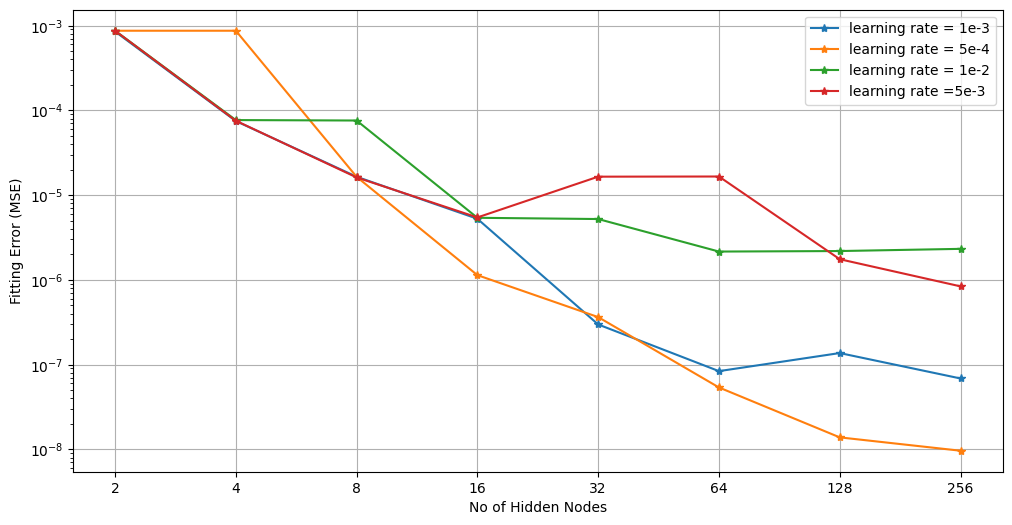

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(no_hidden_nodes, basket_mse, label="learning rate = 1e-3", marker='*')
plt.plot(no_hidden_nodes, basket_mse_lr2, label="learning rate = 5e-4", marker='*')
plt.plot(no_hidden_nodes, basket_mse_lr3, label="learning rate = 1e-2", marker='*')
plt.plot(no_hidden_nodes, basket_mse_lr4, label="learning rate =5e-3", marker='*')
plt.yscale("log")
plt.xscale('log', base=2)
plt.xticks(no_hidden_nodes, labels= [str(i) for i in no_hidden_nodes])
plt.legend()
plt.xlabel("No of Hidden Nodes")
plt.ylabel("Fitting Error (MSE)")
plt.grid(True)
plt.savefig("./Results/Basket_RLNN_Hidden_Nodes_MSE.jpeg")
plt.show()

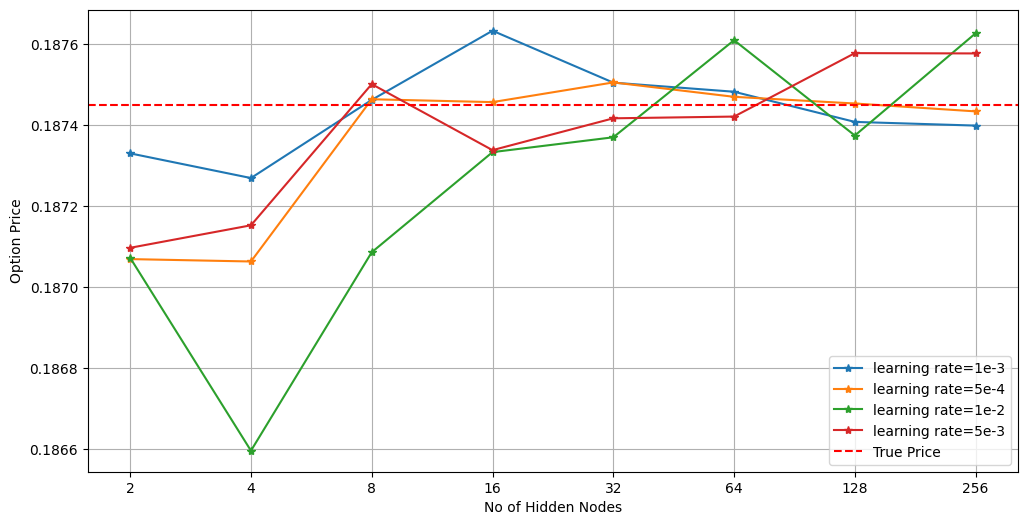

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(no_hidden_nodes, RLNN_Basket_price, label="learning rate=1e-3", marker='*')
plt.plot(no_hidden_nodes, RLNN_Basket_price_lr2, label="learning rate=5e-4", marker='*')
plt.plot(no_hidden_nodes, RLNN_Basket_price_lr3, label="learning rate=1e-2", marker='*')
plt.plot(no_hidden_nodes, RLNN_Basket_price_lr4, label="learning rate=5e-3", marker='*')
plt.axhline(y=true_price/100, color='r', linestyle='--', label="True Price")
plt.xscale('log', base=2)
plt.xticks(no_hidden_nodes, labels=[str(val) for val in no_hidden_nodes])
plt.xlabel("No of Hidden Nodes")
plt.ylabel("Option Price")
plt.grid(True)
plt.savefig("./Results/Basket_RLNN_Hidden_Nodes_Price.jpeg")

plt.legend()
plt.show()


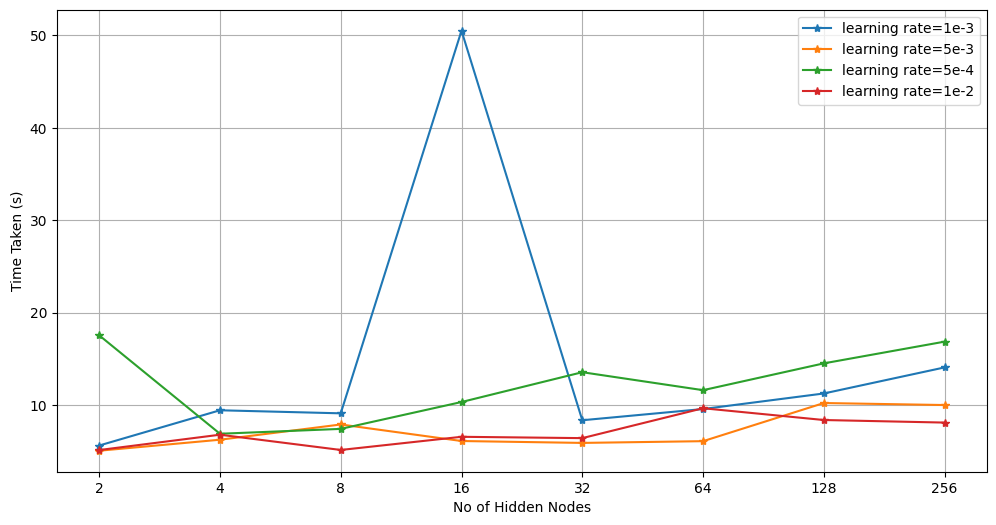

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(no_hidden_nodes, time_taken_lr1, label="learning rate=1e-3", marker='*')
plt.plot(no_hidden_nodes, time_taken_lr2, label="learning rate=5e-3", marker='*')
plt.plot(no_hidden_nodes, time_taken_lr3, label="learning rate=5e-4", marker='*')
plt.plot(no_hidden_nodes, time_taken_lr4, label="learning rate=1e-2", marker='*')
plt.xscale('log', base=2)
plt.xticks(no_hidden_nodes, labels=[str(val) for val in no_hidden_nodes])
plt.xlabel("No of Hidden Nodes")
plt.ylabel("Time Taken (s)")
plt.legend()
plt.grid(True)
plt.savefig("./Results/Basket_RLNN_Hidden_Nodes_Time.jpeg")
plt.show()

In [32]:
learning_rate = 5e-4
option_price_Basket_sample_size = []
mse_sample_size = []
sample_sizes = [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
for sample_size in tqdm(sample_sizes):
    start = time.time()
    nn_model = multi_asset_NN(64)
    price, mse, _ = RLNN_MultiAsset(sample_size, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    option_price_Basket_sample_size.append(price)
    mse_sample_size.append(mse)

  0%|          | 0/11 [00:00<?, ?it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - loss: 7.5232e-06
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 9.0264e-07
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 9.6770e-07


  9%|▉         | 1/11 [00:04<00:43,  4.38s/it]

mse at 0 1.1050746024920954e-06
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - loss: 2.1737e-06
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 8.5510e-08
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - loss: 3.7677e-07


 18%|█▊        | 2/11 [00:10<00:45,  5.11s/it]

mse at 0 5.017669764129096e-07
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step - loss: 9.0548e-07
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - loss: 1.5230e-07
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - loss: 8.0463e-08


 27%|██▋       | 3/11 [00:25<01:17,  9.64s/it]

mse at 0 7.187531281260817e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step - loss: 1.1557e-06
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - loss: 1.3851e-07
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 1.7222e-07


 36%|███▋      | 4/11 [00:32<01:01,  8.79s/it]

mse at 0 1.9403482554025686e-07
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step - loss: 2.8320e-07
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - loss: 5.2358e-08
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - loss: 5.3773e-08


 45%|████▌     | 5/11 [00:49<01:09, 11.64s/it]

mse at 0 6.45393001263983e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.9959e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 5.2435e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - loss: 4.4244e-08


 55%|█████▍    | 6/11 [01:04<01:04, 13.00s/it]

mse at 0 4.7129177005444944e-08
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 3.4188e-06
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 5.1816e-08
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - loss: 8.7563e-08
mse at 0 1.0036883679731545e-07


 64%|██████▎   | 7/11 [01:15<00:49, 12.34s/it]

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 2.8072e-06
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 6.1130e-08
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 8.9026e-08
mse at 0 7.800329626661551e-08


 73%|███████▎  | 8/11 [01:31<00:40, 13.35s/it]

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 2.0597e-05
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 6.7639e-08
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - loss: 5.7826e-08
mse at 0 5.7872981074069685e-08


 82%|████████▏ | 9/11 [01:47<00:28, 14.27s/it]

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.5854e-07
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 5.0302e-08
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 6.1691e-08
mse at 0 7.00022795285804e-08


 91%|█████████ | 10/11 [02:04<00:15, 15.10s/it]

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 1.5646e-07
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 7.4207e-08
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 7.9519e-08
mse at 0 8.03527697712525e-08


100%|██████████| 11/11 [02:23<00:00, 13.08s/it]


In [39]:
dict1 = {"Sample Size": sample_sizes, "Option Price": option_price_Basket_sample_size, "MSE": mse_sample_size}
df = pd.DataFrame(dict1)
df.to_csv("./Results/Basket_RLNN_Sample_Size.csv", index=False)

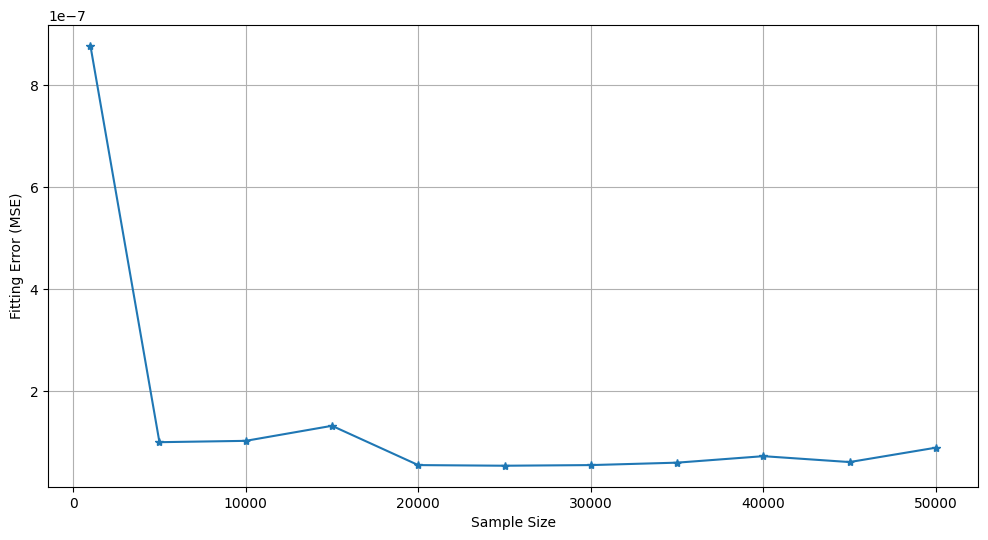

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, mse_sample_size, label="Option Price", marker='*')
#plt.yscale("log")
plt.xlabel("Sample Size")
plt.ylabel("Fitting Error (MSE)")
plt.grid(True)
plt.savefig("./Results/Basket_RLNN_Sample_Size_MSE.jpeg")
plt.show()

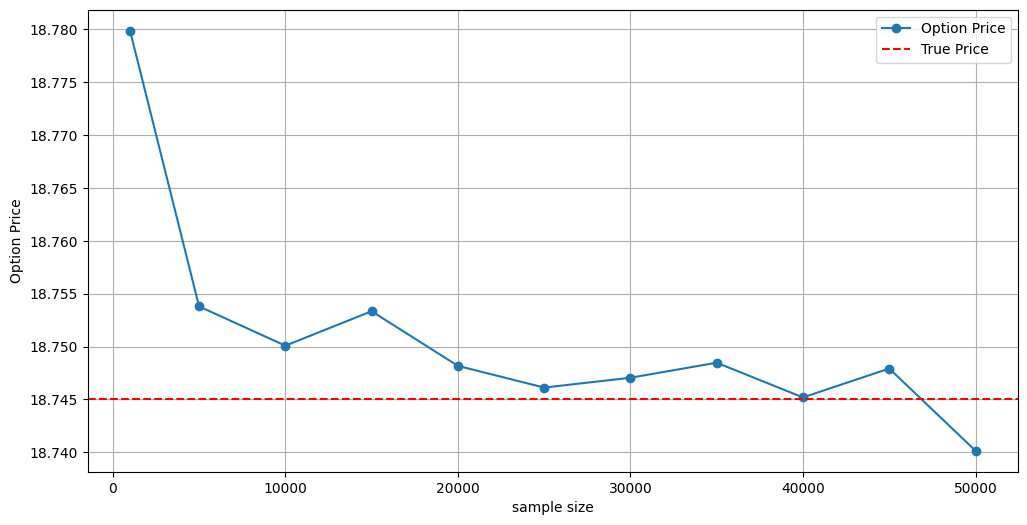

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, np.array(option_price_Basket_sample_size) * 100, label="Option Price", marker='o')
plt.axhline(y=true_price, color='r', linestyle='--', label="True Price")
plt.xlabel("sample size")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.savefig("./Results/Basket_RLNN_Sample_Size_Price.jpeg")
plt.show()


### Different Level of Moneyness

In [42]:
# In the Money option
no_hidden_nodes = 64
nn_model = multi_asset_NN(no_hidden_nodes)
S0 = 1
K = 1.1
itm_prices = []
no_of_paths = 25000

for i in tqdm(range(30)):
    Basket_price, mse, _ = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    itm_prices.append(Basket_price)
    
std_err_ITM = np.std(itm_prices) / np.sqrt(30)
mean_price_ITM = np.mean(itm_prices)

  0%|          | 0/30 [00:00<?, ?it/s]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 1.6379e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - loss: 6.6083e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - loss: 5.3110e-08
mse at 0 5.6502575063177574e-08


  3%|▎         | 1/30 [00:10<05:16, 10.92s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 1.6307e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - loss: 5.9193e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - loss: 4.9150e-08
mse at 0 5.198057806410361e-08


  7%|▋         | 2/30 [00:15<03:27,  7.40s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 2.5936e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - loss: 5.2871e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step - loss: 4.6050e-08
mse at 0 4.7848452311427536e-08


 10%|█         | 3/30 [00:22<03:04,  6.85s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 8.5997e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - loss: 4.7823e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 4.1140e-08
mse at 0 4.241104534230544e-08


 13%|█▎        | 4/30 [00:32<03:31,  8.14s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 9.3883e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - loss: 4.6456e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 3.8632e-08


 17%|█▋        | 5/30 [00:44<04:04,  9.76s/it]

mse at 0 4.079979021298641e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 1.0919e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - loss: 4.3952e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 3.6413e-08
mse at 0 3.8377379496523645e-08


 20%|██        | 6/30 [00:49<03:12,  8.03s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 2.2901e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - loss: 4.2220e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 3.6169e-08
mse at 0 3.755675237471223e-08


 23%|██▎       | 7/30 [00:55<02:47,  7.26s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.1842e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 3.9451e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 3.5652e-08


 27%|██▋       | 8/30 [01:02<02:43,  7.44s/it]

mse at 0 3.631539158277519e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - loss: 4.1150e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - loss: 3.8152e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - loss: 3.5454e-08
mse at 0 3.588348107541606e-08


 30%|███       | 9/30 [01:11<02:42,  7.73s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.7966e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - loss: 3.6093e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 3.4021e-08
mse at 0 3.436015205693366e-08


 33%|███▎      | 10/30 [01:22<02:57,  8.87s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.0764e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 3.3612e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.2553e-08
mse at 0 3.309683194174795e-08


 37%|███▋      | 11/30 [01:29<02:36,  8.23s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - loss: 1.1135e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - loss: 3.4358e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 3.2537e-08
mse at 0 3.310716678583958e-08


 40%|████      | 12/30 [01:36<02:19,  7.75s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - loss: 8.0555e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - loss: 3.4040e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 3.2207e-08
mse at 0 3.275029314409039e-08


 43%|████▎     | 13/30 [01:45<02:17,  8.10s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - loss: 8.0188e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 3.5026e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - loss: 3.2290e-08


 47%|████▋     | 14/30 [01:52<02:05,  7.85s/it]

mse at 0 3.2894352131052074e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - loss: 2.1765e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - loss: 3.4066e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.2219e-08
mse at 0 3.2645612435544535e-08


 50%|█████     | 15/30 [02:00<02:00,  8.01s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 1.1200e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - loss: 3.3725e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 3.1977e-08
mse at 0 3.240639401269618e-08


 53%|█████▎    | 16/30 [02:07<01:46,  7.61s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 2.3470e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - loss: 3.3713e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 3.1793e-08


 57%|█████▋    | 17/30 [02:17<01:47,  8.28s/it]

mse at 0 3.2294220631001735e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 5.7478e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 3.3388e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.1229e-08
mse at 0 3.183458829880692e-08


 60%|██████    | 18/30 [02:23<01:31,  7.60s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.0218e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - loss: 3.3318e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 3.0825e-08


 63%|██████▎   | 19/30 [02:30<01:21,  7.39s/it]

mse at 0 3.149471083929711e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 1.7139e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 3.3425e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 3.0587e-08


 67%|██████▋   | 20/30 [02:36<01:10,  7.02s/it]

mse at 0 3.137231630034876e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 6.2396e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - loss: 3.3356e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.0483e-08


 70%|███████   | 21/30 [02:41<00:56,  6.33s/it]

mse at 0 3.1343354578439175e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 1.6476e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 3.2990e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 3.0454e-08
mse at 0 3.1184391957594926e-08


 73%|███████▎  | 22/30 [02:49<00:56,  7.03s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 6.1987e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 3.2994e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 3.0206e-08
mse at 0 3.102988088699021e-08


 77%|███████▋  | 23/30 [02:57<00:50,  7.23s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 1.8909e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 3.3054e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 2.9891e-08
mse at 0 3.077994037425924e-08


 80%|████████  | 24/30 [03:06<00:46,  7.80s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 1.9447e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 3.3476e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 2.9748e-08


 83%|████████▎ | 25/30 [03:13<00:37,  7.57s/it]

mse at 0 3.072494436651141e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 6.0217e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 3.3131e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 2.9130e-08


 87%|████████▋ | 26/30 [03:19<00:28,  7.02s/it]

mse at 0 3.025703065873131e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 5.9978e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 3.3564e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 2.8973e-08


 90%|█████████ | 27/30 [03:24<00:19,  6.38s/it]

mse at 0 3.00809510633826e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 1.9186e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 3.3220e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 2.8731e-08
mse at 0 2.978565483147122e-08


 93%|█████████▎| 28/30 [03:30<00:12,  6.43s/it]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 6.3188e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - loss: 3.3070e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 2.8663e-08


 97%|█████████▋| 29/30 [03:36<00:06,  6.24s/it]

mse at 0 2.9541043389258448e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 1.0823e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - loss: 3.2391e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 2.7969e-08


100%|██████████| 30/30 [03:42<00:00,  7.43s/it]

mse at 0 2.8751005132221508e-08


In [43]:
# At the Money option
no_hidden_nodes = 64
nn_model = multi_asset_NN(no_hidden_nodes)
S0 = 1
K = 1
atm_prices = []

for i in range(30):
    Basket_price, mse, _ = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    atm_prices.append(Basket_price)
    
std_err_ATM = np.std(atm_prices) / np.sqrt(30)
mean_price_ATM = np.mean(atm_prices)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 3.9959e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - loss: 5.2435e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 4.4244e-08
mse at 0 4.7129177005444944e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 2.2113e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - loss: 4.4571e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - loss: 4.1226e-08
mse at 0 4.271212361572907e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 9.0265e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - loss: 4.1526e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - loss: 3.8485e-08
mse at 0 3.983464225143507e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - loss: 1.1825e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 4.0308e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - loss: 3.5961e-08
mse at 0 3.770372458689053e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - loss: 9.2827e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - loss: 4.0673e-08
469/469

In [44]:
# Out of the Money option
no_hidden_nodes = 64
nn_model = multi_asset_NN(no_hidden_nodes)
S0 = 1
K = 0.9
otm_prices = []

for i in range(30):
    Basket_price, mse, _ = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")
    otm_prices.append(Basket_price)
    
std_err_OTM = np.std(otm_prices) / np.sqrt(30)
mean_price_OTM = np.mean(otm_prices)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 1.1985e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - loss: 4.5437e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - loss: 3.5477e-08
mse at 0 3.8894576448456064e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - loss: 9.2618e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - loss: 3.6645e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - loss: 3.0504e-08
mse at 0 3.251678037941019e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step - loss: 9.1038e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - loss: 3.4054e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 2.9056e-08
mse at 0 3.0603576561816226e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - loss: 8.7463e-08
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - loss: 3.2802e-08
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - loss: 2.7972e-08
mse at 0 2.950360133979757e-08
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - loss: 1.1140e-07
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - loss: 3.2333e-08
469/46

In [45]:
# Out of the Money option using MC
S0 = 1
K = 0.9
otm_prices_MC = []

for i in range(30):
    Basket_price= arithmatic_basket_option_price(S0, r, vol_list, cor_mat, dt, no_of_assets, w, K, no_of_paths)
    otm_prices_MC.append(Basket_price)
    
std_err_OTM_MC = np.std(otm_prices_MC) / np.sqrt(30)
mean_price_OTM_MC = np.mean(otm_prices_MC)

In [46]:
# At the Money option using MC
S0 = 1
K = 1
atm_prices_MC = []

for i in range(30):
    Basket_price = arithmatic_basket_option_price(S0, r, vol_list, cor_mat, dt, no_of_assets, w, K, no_of_paths)
    atm_prices_MC.append(Basket_price)
    
std_err_ATM_MC = np.std(atm_prices_MC) / np.sqrt(30)
mean_price_ATM_MC = np.mean(atm_prices_MC)

In [47]:
# In the Money option using MC
S0 = 1
K = 1.1
itm_prices_MC = []

for i in range(30):
    Basket_price = arithmatic_basket_option_price(S0, r, vol_list, cor_mat, dt, no_of_assets, w, K, no_of_paths)
    itm_prices_MC.append(Basket_price)
    
std_err_ITM_MC = np.std(itm_prices_MC) / np.sqrt(30)
mean_price_ITM_MC = np.mean(itm_prices_MC)

In [48]:
print("In the money option_price RLNN: ", mean_price_ITM, " standard error" ,std_err_ITM, "MC: ", mean_price_ITM_MC, " standard error", std_err_ITM_MC)
print("At the money option_price RLNN: ", mean_price_ATM, " standard error", std_err_ATM, "MC: ", mean_price_ATM_MC, " standard error", std_err_ATM_MC)
print("Out of the money option_price RLNN: ", mean_price_OTM, " standard error", std_err_OTM, "MC: ", mean_price_OTM_MC, " standard error", std_err_OTM_MC)

In the money option_price RLNN:  0.24524990344955205  standard error 1.3019031599194332e-06 MC:  0.24538319251961133  standard error 0.00029585875835446513
At the money option_price RLNN:  0.18746256984065196  standard error 1.5868619205847248e-06 MC:  0.18723615062204974  standard error 0.0002572428839011942
Out of the money option_price RLNN:  0.13648095877431957  standard error 1.4624726140077664e-06 MC:  0.13660124652293323  standard error 0.00021203514082091345


In [ ]:
# Given parameters
S0 = 1  # Initial asset price
K = 1   # Strike price
r = 0.05  # Risk-free interest rate
q = 0  # Dividend yield
T = 1  # Time to maturity
no_of_exercise_days = 1  # Number of time steps
vol_list = np.array([0.518, 0.648, 0.623, 0.570, 0.530])  # Volatility vector

# Correlation matrix
cor_mat = np.array([
    [1.00, 0.79, 0.82, 0.91, 0.84],
    [0.79, 1.00, 0.73, 0.80, 0.76],
    [0.82, 0.73, 1.00, 0.77, 0.72],
    [0.91, 0.80, 0.77, 1.00, 0.90],
    [0.84, 0.76, 0.72, 0.90, 1.00]
])
no_of_paths = 20000
no_of_assets = 5
K = 1
T = 1
dt = T / (no_of_exercise_days)
#cor_mat = np.ones((no_of_assets, no_of_assets))

w = np.array([0.381, 0.065, 0.057, 0.270, 0.227])
w = w.reshape(-1, 1)
# cor_mat = np.eye(no_of_assets)
# vol_list = np.ones(no_of_assets) * 0.2
cov_mat = generate_covarinace_mat(cor_mat, vol_list, dt)
r = 0.05
S0 = 1
divident = 0.0
learning_rate = 5e-4
no_hidden_nodes = 16
nn_model = multi_asset_NN(no_hidden_nodes)
price, mse, weights = RLNN_MultiAsset(no_of_paths, no_of_assets, K, r, dt, divident , nn_model, cor_mat, vol_list, w, no_of_exercise_days, S0, learning_rate, "Basket")

print("Price of the option is: ", price)
print("Mean Squared Error is: ", mse)
print("Weights are: ", weights)